<a href="https://colab.research.google.com/github/RadoslavTsvetanov/Cats_and_dogs_classifier_pytorch/blob/main/Cats_andDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pathlib
import zipfile




data_folder = pathlib.Path("data/")

image_path = data_folder / "cats_dogs"

if image_path.is_dir():
  print("already exists")
  subdirectories = [item for item in image_path.iterdir() if item.is_dir()]

    # Print the list of subdirectories
  for subdirectory in subdirectories:
        print(subdirectory)
else:
  image_path.mkdir(parents=True,exist_ok=True)



In [2]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.linear import Linear
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.conv import Conv2d
from torch.nn.modules.pooling import MaxPool2d
import torch
from torch import nn



class Cat_or_Dog_Classifier(nn.Module):
  def __init__(self,input_feauters,hidden_features_1,hidden_features_2,linear_features_1,linear_feauters_2,output_features,):
    super(Cat_or_Dog_Classifier, self).__init__();
    self.model = nn.Sequential(
        Conv2d(input_feauters,hidden_features_1,kernel_size=1,stride=1),
        ReLU(),
        MaxPool2d(2),
        Conv2d(hidden_features_1,hidden_features_2,kernel_size=1,stride=1),
        ReLU(),
        MaxPool2d(2),
        Conv2d(hidden_features_2,hidden_features_2,kernel_size=2,stride=1),
        ReLU(),
        MaxPool2d(2),
        Flatten(),
        Linear(linear_features_1 * 27 * 27,linear_feauters_2),
        Linear(linear_feauters_2,output_features)
    )

  def forward(self,x):
      return self.model(x)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the data
])

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Assuming you have two subfolders 'Cats' and 'Dogs'
        for label, class_name in enumerate(os.listdir(root_dir)):
            class_path = os.path.join(root_dir, class_name)
            for image_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, image_name))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label
dataset = CustomDataset(root_dir='drive/MyDrive/PetImages', transform=transform)

train_size = int(0.8 * (len(dataset) - 15000))
print(len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


batch_size = 32  # Adjust this as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)



15566


tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0])


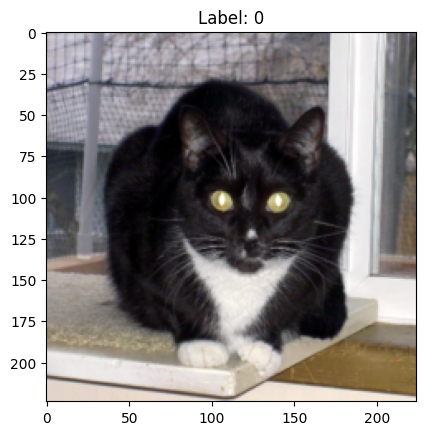

In [4]:
#Testing the dataset

import matplotlib.pyplot as plt
from PIL import Image

data_iter = iter(train_loader)
images, labels = next(data_iter)


image = images[0]
label = labels[0]

print(labels)

# Convert the PyTorch tensor to a NumPy array and transpose it to (H, W, C)
image = image.numpy().transpose((1, 2, 0))

# Inverse normalization if you applied normalization during dataset creation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
image = image * std + mean

# Display the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()


In [5]:
#Training the model
import torch
import torch.optim as optim
import torch.nn as nn

model = Cat_or_Dog_Classifier(input_feauters=3,hidden_features_1=16,hidden_features_2=32,linear_features_1=32,linear_feauters_2=16,output_features=2)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item()}')
#Dataloader is small fix it


Epoch [1/10], Training Loss: 0.20461854338645935
Epoch [2/10], Training Loss: 0.5923369526863098
Epoch [3/10], Training Loss: 0.6666253805160522
Epoch [4/10], Training Loss: 0.5734499096870422
Epoch [5/10], Training Loss: 0.7564187049865723
Epoch [6/10], Training Loss: 0.37492629885673523
Epoch [7/10], Training Loss: 0.31855764985084534
Epoch [8/10], Training Loss: 0.0889492779970169
Epoch [9/10], Training Loss: 0.17362861335277557
Epoch [10/10], Training Loss: 0.20992188155651093


In [ ]:
print(val_loader)

NameError: ignored

In [17]:
import PIL

# Set the model in evaluation mode
model.eval()

# with torch.no_grad():
#     total_correct = 0
#     total_samples = 0

#     # Assuming val_loader contains only one image
#     for inputs, labels in val_loader:
#         try:
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             total_samples += 1
#             total_correct += (predicted == labels).item()  # Assuming labels is a scalar
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             continue  # Skip the current image and continue with the next one (if available)

#     accuracy = 100 * total_correct / total_samples
#     print(f'Validation Accuracy: {accuracy:.2f}%')

# Assuming val_loader[0] represents one image and label
if len(val_loader) > 0:
    input_image, label = val_loader.dataset[0]
    input_image = input_image.unsqueeze(0)  # Add a batch dimension to the image

    output = model(input_image)
    _, predicted_label = torch.max(output, 1)

    print(f'Predicted Label: {predicted_label}, Actual Label: {label}')

print('Testing on a single image complete.')

Predicted Label: tensor([0]), Actual Label: 0
Testing on a single image complete.
